# DATA CLEANING

In [115]:
import numpy as np
import pandas as pd 
import missingno as msno
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

In [91]:
df = pd.read_csv('application_train.csv')

In [92]:
df.rename(str.lower, axis='columns', inplace=True)

In [93]:
df_col = pd.read_csv('HomeCredit_columns_description.csv', header=0, encoding='unicode_escape')
df_col = df_col[df_col.Table=='application_{train|test}.csv']
df_col.sort_values(by=['Row'], inplace=True)
df_col.iloc[:,2:]

,Row,Description,Special
9,AMT_ANNUITY,Loan annuity,NaN
8,AMT_CREDIT,Credit amount of the loan,NaN
10,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
7,AMT_INCOME_TOTAL,Income of the client,NaN
117,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),NaN
116,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application,NaN
119,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),NaN
120,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),NaN
118,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),NaN
121,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application),NaN


In [94]:
df.head(3)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [95]:
df.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [96]:
df.shape

(307511, 122)

In [97]:
df.target.value_counts()

0    282686
1     24825
Name: target, dtype: int64

___

# Data Type

In [98]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [99]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [100]:
objects = pd.DataFrame(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
objects.reset_index(inplace=True)
objects['index']

0             name_contract_type
1                    code_gender
2                   flag_own_car
3                flag_own_realty
4                name_type_suite
5               name_income_type
6            name_education_type
7             name_family_status
8              name_housing_type
9                occupation_type
10    weekday_appr_process_start
11             organization_type
12            fondkapremont_mode
13                housetype_mode
14            wallsmaterial_mode
15           emergencystate_mode
Name: index, dtype: object

In [101]:
for i in objects['index']:
    print(i)
    print(df[i].unique())

name_contract_type
['Cash loans' 'Revolving loans']
code_gender
['M' 'F' 'XNA']
flag_own_car
['N' 'Y']
flag_own_realty
['Y' 'N']
name_type_suite
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
name_income_type
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
name_education_type
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
name_family_status
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
name_housing_type
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
occupation_type
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers

## Dummies

In [148]:
df2 = df.copy()

In [149]:
df2['flag_own_car'].replace('Y', value=1, inplace = True)
df2['flag_own_car'].replace('N', value=0, inplace = True)

In [150]:
df2['flag_own_realty'].replace('Y', value=1, inplace = True)
df2['flag_own_realty'].replace('N', value=0, inplace = True)

In [151]:
df2['cash_loan'] = df['name_contract_type']
df2['cash_loan'].replace('Cash loans', value=1, inplace = True)
df2['cash_loan'].replace('Revolving loans', value=0, inplace = True)
df2.drop('name_contract_type', inplace=True, axis=1)

In [152]:
df2['emergencystate_mode'].replace('Yes', value=1, inplace = True)
df2['emergencystate_mode'].replace('No', value=0, inplace = True)

In [153]:
df2 = pd.get_dummies(df2)

In [154]:
df2.head()

,sk_id_curr,target,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,cash_loan,code_gender_F,code_gender_M,code_gender_XNA,name_type_suite_Children,name_type_suite_Family,name_type_suite_Group of people,name_type_suite_Other_A,name_type_suite_Other_B,"name_type_suite_Spouse, partner",name_type_suite_Unaccompanied,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Civil marriage,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Unknown,name_family_status_Widow,name_housing_type_Co-op apartment,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,weekday_appr_process_start_FRIDAY,weekday_appr_process_start_MONDAY,weekday_appr_process_start_SATURDAY,weekday_appr_process_start_SUNDAY,weekday_appr_process_start_THURSDAY,weekday_appr_process_start_TUESDAY,weekday_appr_process_start_WEDNESDAY,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_typ

In [155]:
df2[df2.code_gender_XNA == 1]['code_gender_M'].replace(0, value=np.nan, inplace=True)
df2.drop(columns=['code_gender_F', 'code_gender_XNA'])
df2.rename(columns={'code_gender_M': 'male'}, inplace=True)

___

# Missing Values

In [156]:
df_m = df2.copy()

In [23]:
mis_val = df_m.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df_m)

In [24]:
mis_val_percent.sort_values(ascending=False).head(20)

commonarea_medi             69.872297
commonarea_avg              69.872297
commonarea_mode             69.872297
nonlivingapartments_mode    69.432963
nonlivingapartments_medi    69.432963
nonlivingapartments_avg     69.432963
fondkapremont_mode          68.386172
livingapartments_medi       68.354953
livingapartments_mode       68.354953
livingapartments_avg        68.354953
floorsmin_medi              67.848630
floorsmin_mode              67.848630
floorsmin_avg               67.848630
years_build_medi            66.497784
years_build_avg             66.497784
years_build_mode            66.497784
own_car_age                 65.990810
landarea_mode               59.376738
landarea_avg                59.376738
landarea_medi               59.376738
dtype: float64

In [73]:
df_m.isnull().sum().sort_values(ascending=False)

commonarea_medi                                      214865
commonarea_avg                                       214865
commonarea_mode                                      214865
nonlivingapartments_avg                              213514
nonlivingapartments_medi                             213514
nonlivingapartments_mode                             213514
livingapartments_avg                                 210199
livingapartments_medi                                210199
livingapartments_mode                                210199
floorsmin_avg                                        208642
floorsmin_mode                                       208642
floorsmin_medi                                       208642
years_build_medi                                     204488
years_build_avg                                      204488
years_build_mode                                     204488
own_car_age                                          202929
landarea_avg                            

In [77]:
df_m.columns[df_m.isnull().sum() > 100000]

Index(['own_car_age', 'ext_source_1', 'apartments_avg', 'basementarea_avg',
       'years_beginexpluatation_avg', 'years_build_avg', 'commonarea_avg',
       'elevators_avg', 'entrances_avg', 'floorsmax_avg', 'floorsmin_avg',
       'landarea_avg', 'livingapartments_avg', 'livingarea_avg',
       'nonlivingapartments_avg', 'nonlivingarea_avg', 'apartments_mode',
       'basementarea_mode', 'years_beginexpluatation_mode', 'years_build_mode',
       'commonarea_mode', 'elevators_mode', 'entrances_mode', 'floorsmax_mode',
       'floorsmin_mode', 'landarea_mode', 'livingapartments_mode',
       'livingarea_mode', 'nonlivingapartments_mode', 'nonlivingarea_mode',
       'apartments_medi', 'basementarea_medi', 'years_beginexpluatation_medi',
       'years_build_medi', 'commonarea_medi', 'elevators_medi',
       'entrances_medi', 'floorsmax_medi', 'floorsmin_medi', 'landarea_medi',
       'livingapartments_medi', 'livingarea_medi', 'nonlivingapartments_medi',
       'nonlivingarea_medi', 'to

In [85]:
df_m.columns[(df_m.isnull().sum() < 100000) & (df_m.isnull().sum() > 50)]

Index(['amt_goods_price', 'days_employed', 'ext_source_2', 'ext_source_3',
       'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day',
       'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year', 'employed'],
      dtype='object')

In [30]:
df_m.columns

Index(['amt_annuity', 'amt_goods_price', 'days_employed', 'own_car_age',
       'cnt_fam_members', 'ext_source_1', 'ext_source_2', 'ext_source_3',
       'apartments_avg', 'basementarea_avg',
       ...
       'wallsmaterial_mode_Others', 'wallsmaterial_mode_Panel',
       'wallsmaterial_mode_Stone, brick', 'wallsmaterial_mode_Wooden',
       'male_0', 'male_1', 'male_XNA', 'age', 'employed_mis', 'employed'],
      dtype='object', length=165)

In [29]:
df_m.drop(columns='organization_type_Trade: type 4', inplace=True)

In [31]:
for i in df_m.columns:
    if pd.isnull(df_m[i]).sum() == 0:
        df_m.drop(columns=i, inplace=True)

In [52]:
for col in df_m.columns:
    if (col.split('_')[-1] == 'avg') | (col.split('_')[-1] == 'mode'):
        df_m.drop(columns=col, inplace=True)

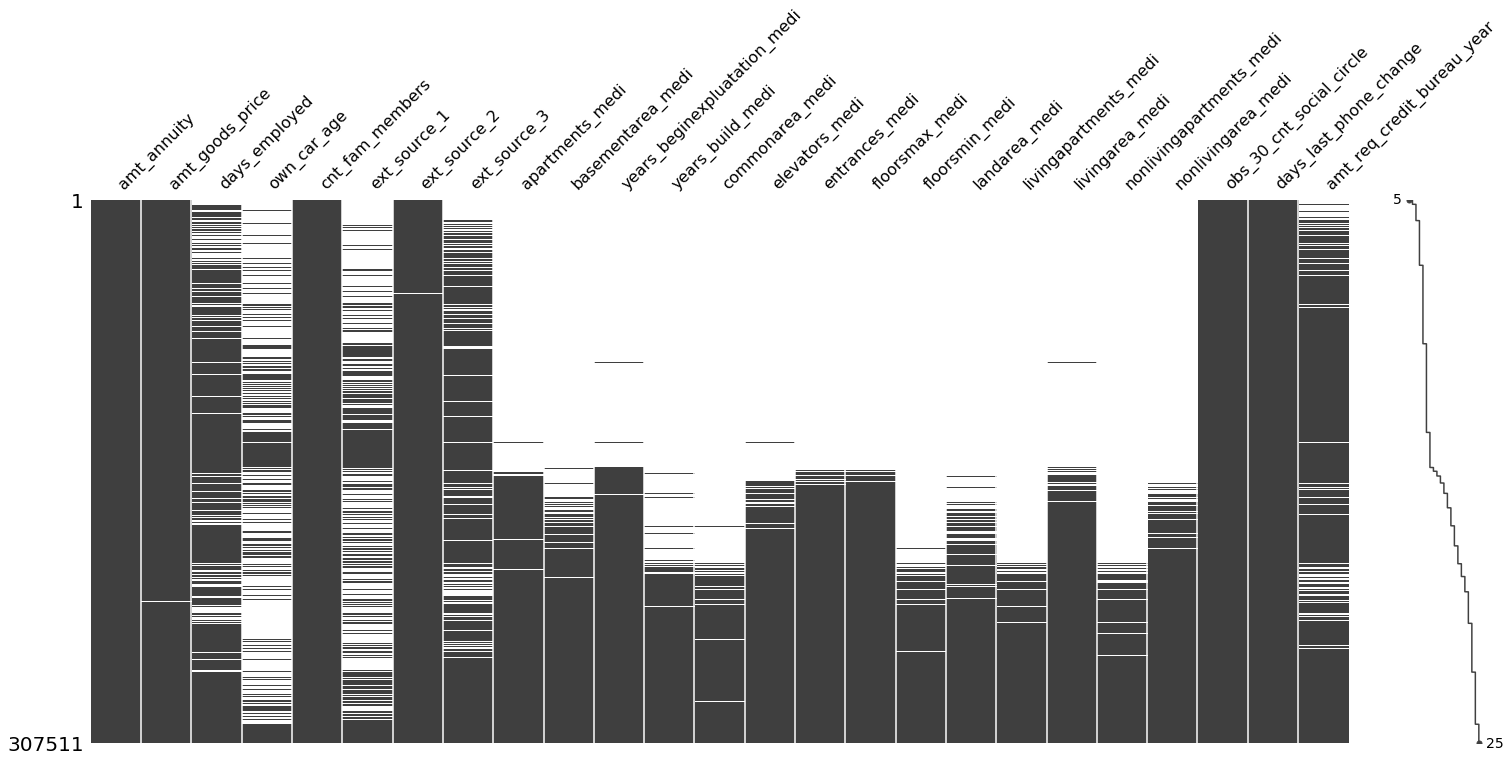

In [57]:
msno.matrix(df_m, sort='ascending')

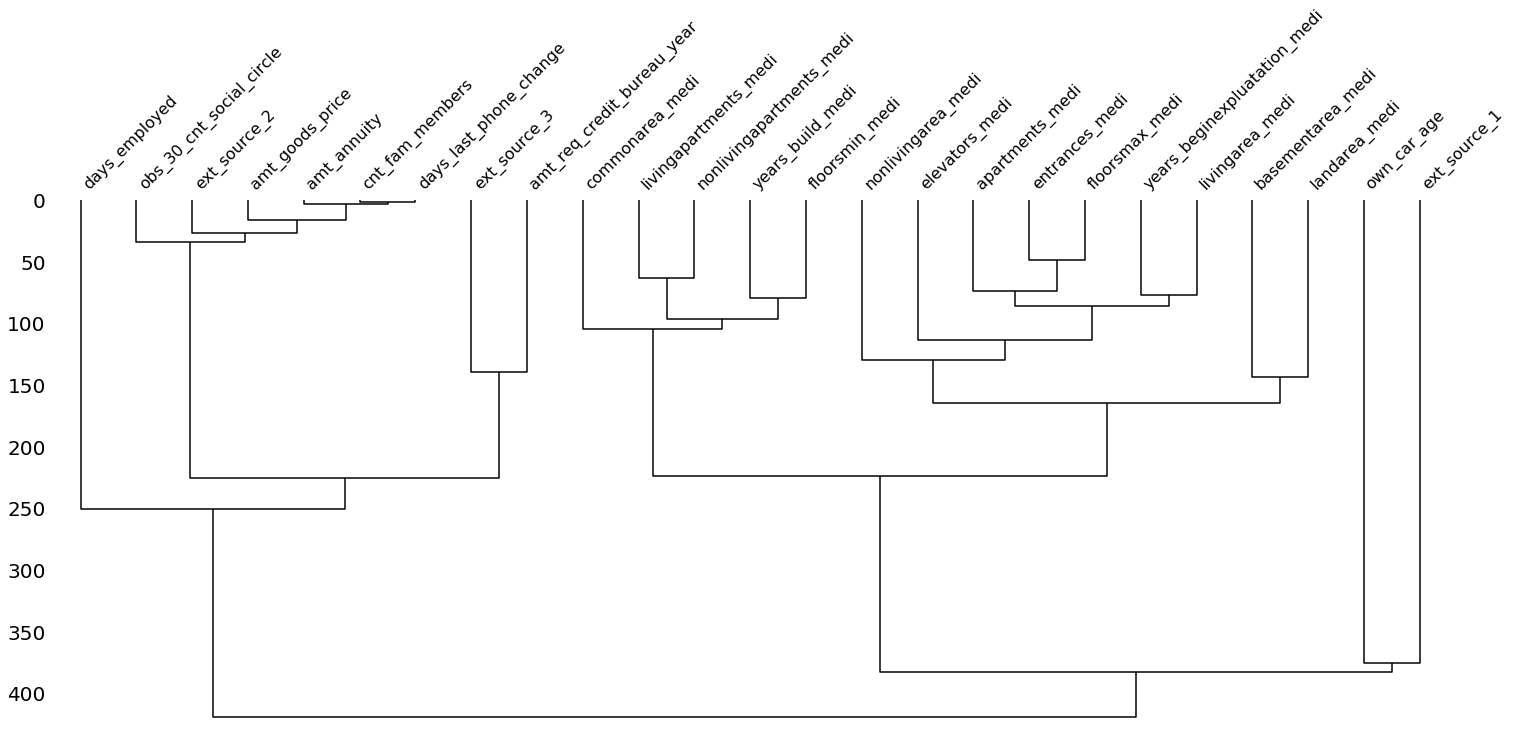

In [58]:
msno.dendrogram(df_m)

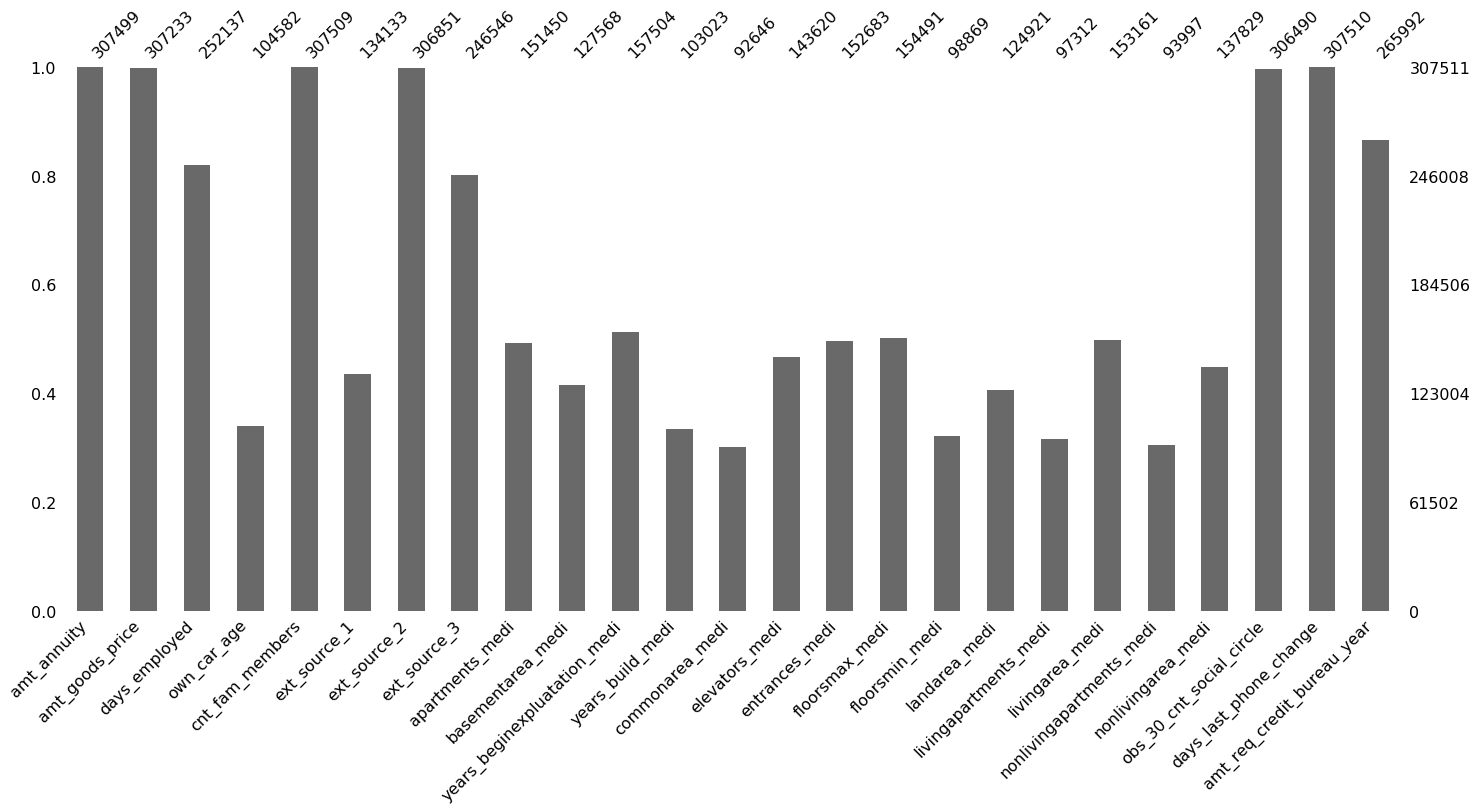

In [59]:
msno.bar(df_m) 

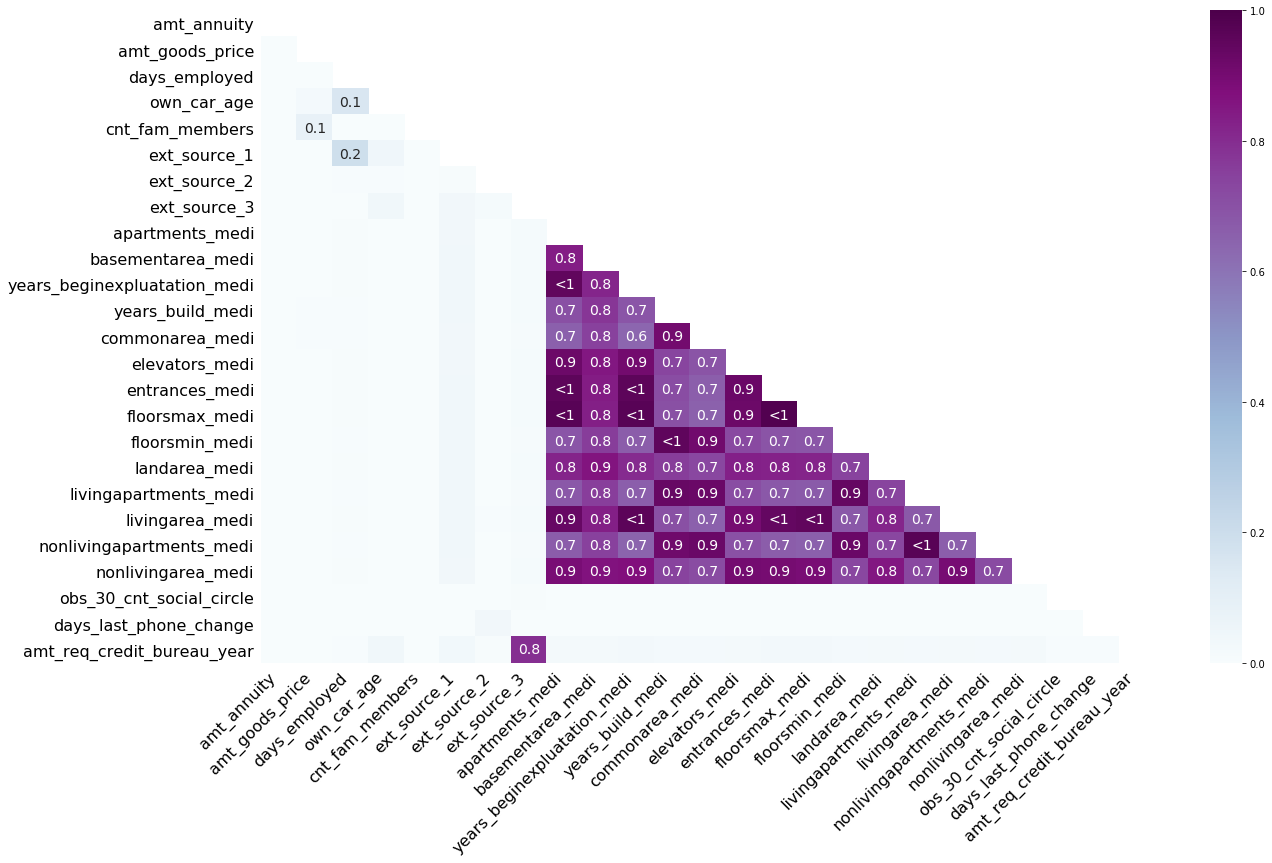

In [64]:
msno.heatmap(df_m, vmin=0, cmap='BuPu')

## Implement

### DROP HOUSE variables with hight number of missings

In [157]:
df2.drop(columns=['apartments_avg', 'basementarea_avg',
       'years_beginexpluatation_avg', 'years_build_avg', 'commonarea_avg',
       'elevators_avg', 'entrances_avg', 'floorsmax_avg', 'floorsmin_avg',
       'landarea_avg', 'livingapartments_avg', 'livingarea_avg',
       'nonlivingapartments_avg', 'nonlivingarea_avg', 'apartments_mode',
       'basementarea_mode', 'years_beginexpluatation_mode', 'years_build_mode',
       'commonarea_mode', 'elevators_mode', 'entrances_mode', 'floorsmax_mode',
       'floorsmin_mode', 'landarea_mode', 'livingapartments_mode',
       'livingarea_mode', 'nonlivingapartments_mode', 'nonlivingarea_mode',
       'apartments_medi', 'basementarea_medi', 'years_beginexpluatation_medi',
       'years_build_medi', 'commonarea_medi', 'elevators_medi',
       'entrances_medi', 'floorsmax_medi', 'floorsmin_medi', 'landarea_medi',
       'livingapartments_medi', 'livingarea_medi', 'nonlivingapartments_medi',
       'nonlivingarea_medi', 'totalarea_mode', 'emergencystate_mode'], inplace=True)

### DROP OBSERVATIONS

In [158]:
# low missing values
df2.dropna(subset=['amt_annuity', 'cnt_fam_members', 'days_last_phone_change'], inplace=True)

### Other variables with missings

In [159]:
df2.own_car_age.fillna(0, inplace=True)
df2.amt_goods_price.fillna(0, inplace=True)
#df2[['ext_source_1', 'days_employed', 'ext_source_2', 'ext_source_3',
 #      'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
  #     'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
   #    'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day',
    #   'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
     #  'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']].head(0) # median

_________

# Featuring

### Age in Years

In [160]:
df2['age'] = df2.days_birth/-365

Text(0, 0.5, 'Frequency')

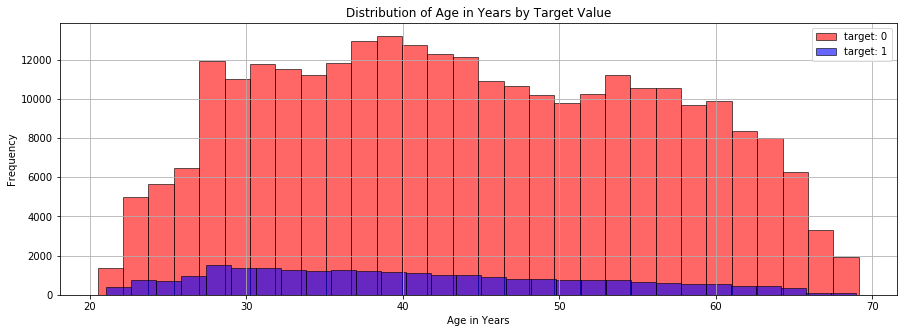

In [161]:
plt.figure(figsize=(15,5))
df2[df2['target']==0]['age'].hist(bins=30, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['age'].hist(bins=30, color='blue', label='target: 1', alpha=0.6)
plt.legend()
plt.title('Distribution of Age in Years by Target Value')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

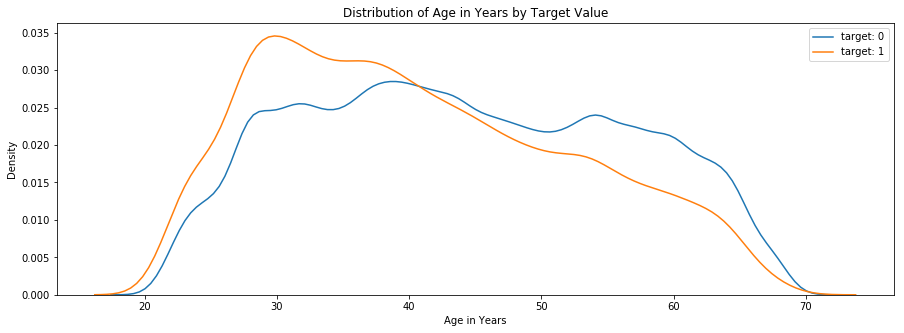

In [162]:
plt.figure(figsize=(15,5))
sns.kdeplot(df2[df2['target']==0]['age'], label = 'target: 0')
sns.kdeplot(df2[df2['target']==1]['age'], label = 'target: 1')
plt.title('Distribution of Age in Years by Target Value')
plt.xlabel('Age in Years')
plt.ylabel('Density')

### Employment in Years

In [163]:
df2.days_employed.describe()

count    307496.000000
mean      63818.252094
std      141278.466175
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: days_employed, dtype: float64

In [164]:
df2['days_employed'].replace(365243, value=np.nan, inplace = True)

In [165]:
df2['employed'] = df2.days_employed/-365

Text(0, 0.5, 'Frequency')

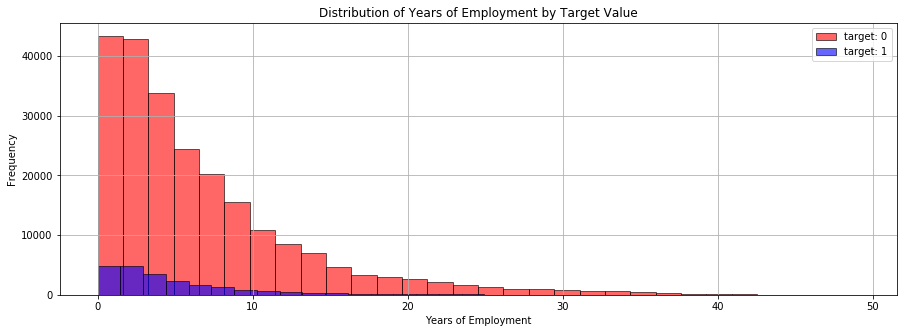

In [166]:
plt.figure(figsize=(15,5))
df2[df2['target']==0]['employed'].hist(bins=30, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['employed'].hist(bins=30, color='blue', label='target: 1', alpha=0.6)
plt.legend()
plt.title('Distribution of Years of Employment by Target Value')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')

/Users/geschew/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/geschew/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Density')

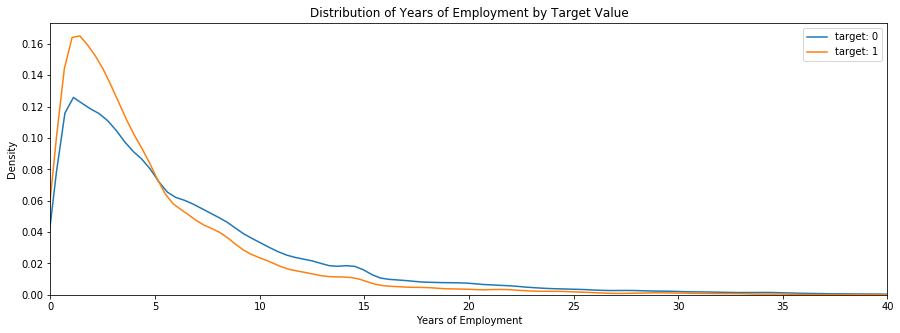

In [167]:
plt.figure(figsize=(15,5))
sns.kdeplot(df2[df2['target']==0]['employed'], label = 'target: 0')
sns.kdeplot(df2[df2['target']==1]['employed'], label = 'target: 1')
plt.xlim(0,40)
plt.title('Distribution of Years of Employment by Target Value')
plt.xlabel('Years of Employment')
plt.ylabel('Density')

### Credit Coverage Ratio

In [168]:
df2['credit_coverage'] = df2.amt_credit/df2.amt_income_total

In [169]:
df2['credit_coverage'].describe()

count    307496.000000
mean          3.957625
std           2.689768
min           0.004808
25%           2.018667
50%           3.265067
75%           5.160000
max          84.736842
Name: credit_coverage, dtype: float64

Text(0, 0.5, 'Frequency')

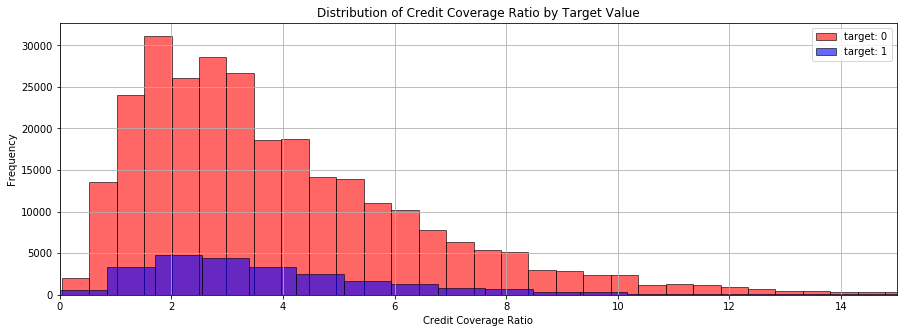

In [170]:
plt.figure(figsize=(15,5))
df2[df2['target']==0]['credit_coverage'].hist(bins=100, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['credit_coverage'].hist(bins=100, color='blue', label='target: 1', alpha=0.6)
plt.xlim(0,15)
plt.legend()
plt.title('Distribution of Credit Coverage Ratio by Target Value')
plt.xlabel('Credit Coverage Ratio')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

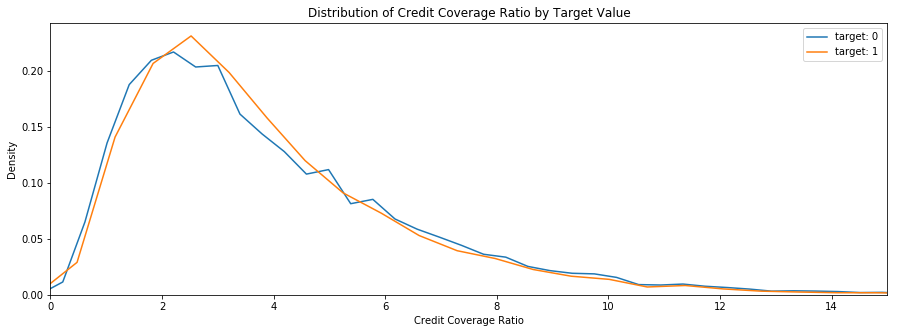

In [171]:
plt.figure(figsize=(15,5))
sns.kdeplot(df2[df2['target']==0]['credit_coverage'], label = 'target: 0')
sns.kdeplot(df2[df2['target']==1]['credit_coverage'], label = 'target: 1')
plt.xlim(0,15)
plt.title('Distribution of Credit Coverage Ratio by Target Value')
plt.xlabel('Credit Coverage Ratio')
plt.ylabel('Density')

### Debt Service Coverage Ratio

In [172]:
df2['DSCR'] = df2.amt_annuity/df2.amt_income_total

In [173]:
df2['DSCR'].describe()

count    307496.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: DSCR, dtype: float64

Text(0, 0.5, 'Frequency')

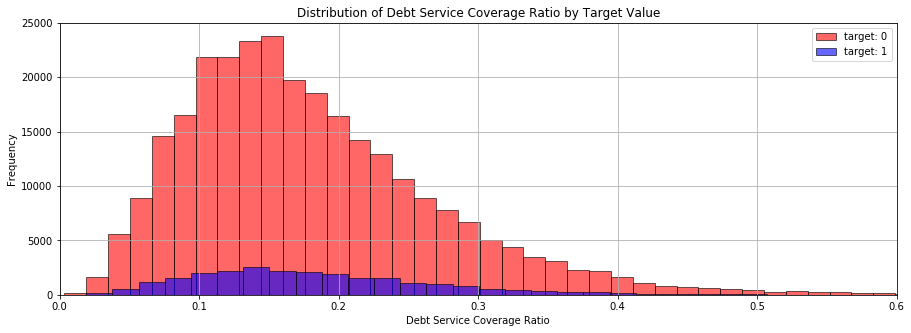

In [174]:
plt.figure(figsize=(15,5))
df2[df2['target']==0]['DSCR'].hist(bins=100, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['DSCR'].hist(bins=100, color='blue', label='target: 1', alpha=0.6)
plt.xlim(0,0.6)
plt.legend()
plt.title('Distribution of Debt Service Coverage Ratio by Target Value')
plt.xlabel('Debt Service Coverage Ratio')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

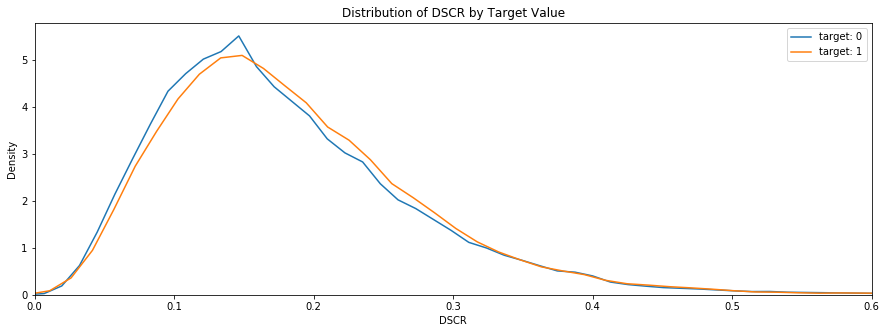

In [175]:
plt.figure(figsize=(15,5))
sns.kdeplot(df2[df2['target']==0]['DSCR'], label = 'target: 0')
sns.kdeplot(df2[df2['target']==1]['DSCR'], label = 'target: 1')
plt.xlim(0,0.6)
plt.title('Distribution of DSCR by Target Value')
plt.xlabel('DSCR')
plt.ylabel('Density')

### Credit Term

In [176]:
df2['term'] = df2.amt_credit/df2.amt_annuity

In [177]:
df2['term'].describe()

count    307496.000000
mean         21.612368
std           7.823836
min           8.036674
25%          15.614496
50%          20.000000
75%          27.099985
max          45.305079
Name: term, dtype: float64

Text(0, 0.5, 'Frequency')

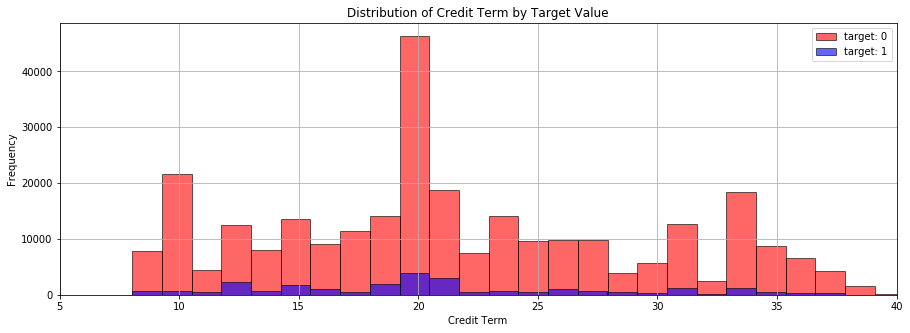

In [178]:
plt.figure(figsize=(15,5))
df2[df2['target']==0]['term'].hist(bins=30, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['term'].hist(bins=30, color='blue', label='target: 1', alpha=0.6)
plt.xlim(5,40)
plt.legend()
plt.title('Distribution of Credit Term by Target Value')
plt.xlabel('Credit Term')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

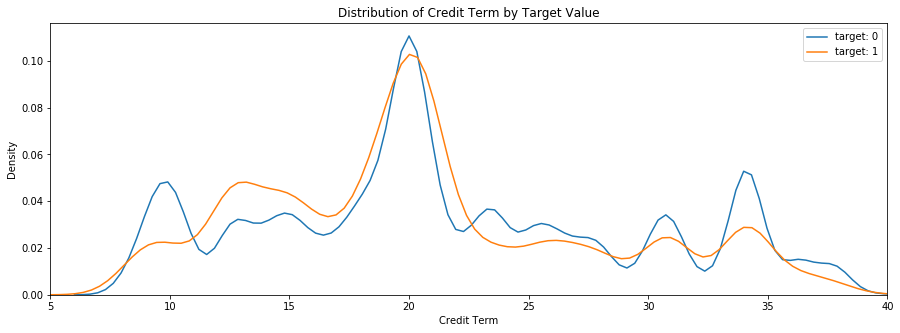

In [179]:
plt.figure(figsize=(15,5))
sns.kdeplot(df2[df2['target']==0]['term'], label = 'target: 0')
sns.kdeplot(df2[df2['target']==1]['term'], label = 'target: 1')
plt.xlim(5,40)
plt.title('Distribution of Credit Term by Target Value')
plt.xlabel('Credit Term')
plt.ylabel('Density')

### Drop featured original Variables

In [180]:
df2.drop('days_employed', inplace=True, axis=1)
df2.drop('days_birth', inplace=True, axis=1)
df2.drop('amt_credit', inplace=True, axis=1)
df2.drop('amt_income_total', inplace=True, axis=1)
df2.drop('amt_annuity', inplace=True, axis=1)

In [55]:
#df2.drop('name_type_suite', inplace=True, axis=1)
#df2.drop('name_income_type', inplace=True, axis=1)
#df2.drop('name_education_type', inplace=True, axis=1)
#df2.drop('name_family_status', inplace=True, axis=1)
#df2.drop('name_housing_type', inplace=True, axis=1)
#df2.drop('occupation_type', inplace=True, axis=1)
#df2.drop('weekday_appr_process_start', inplace=True, axis=1)
#df2.drop('organization_type', inplace=True, axis=1)
#df2.drop('fondkapremont_mode', inplace=True, axis=1)
#df2.drop('housetype_mode', inplace=True, axis=1)
#df2.drop('wallsmaterial_mode', inplace=True, axis=1)

___

# Extract Data

In [181]:
df2.head(2)

,sk_id_curr,target,flag_own_car,flag_own_realty,cnt_children,amt_goods_price,region_population_relative,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,cash_loan,code_gender_F,male,code_gender_XNA,name_type_suite_Children,name_type_suite_Family,name_type_suite_Group of people,name_type_suite_Other_A,name_type_suite_Other_B,"name_type_suite_Spouse, partner",name_type_suite_Unaccompanied,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Civil marriage,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Unknown,name_family_status_Widow,name_housing_type_Co-op apartment,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,weekday_appr_process_start_FRIDAY,weekday_appr_process_start_MONDAY,weekday_appr_process_start_SATURDAY,weekday_appr_process_start_SUNDAY,weekday_appr_process_start_THURSDAY,weekday_appr_process_start_TUESDAY,weekday_appr_process_start_WEDNESDAY,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,

In [182]:
df2.drop(columns='sk_id_curr', inplace=True)
df.rename(str.lower, axis='columns', inplace=True)

In [183]:
df2.to_csv('application_clean.csv')